<a href="https://colab.research.google.com/github/sergienko4/deep-learing/blob/main/ex2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning: Ex.2 - Multilayer Perceptron 

Submitted by: [... **name & ID** ...]


In [14]:
# TensorFlow 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.6.0


In [15]:
def figure_result(loss,val_loss,accuracy, val_accuracy):
  plt.figure(figsize=(12,4))
  plt.subplot(1,2,1)
  plt.plot(loss,'r', label='train')
  plt.plot(val_loss,':r', label='test')
  plt.title('Loss',fontsize=14)
  plt.xlabel('Epochs',fontsize=14)
  plt.legend()
  plt.grid()

  plt.subplot(1,2,2)
  plt.plot(accuracy,'b', label='train')
  plt.plot(val_accuracy,':b', label='test')
  plt.ylim([0, 1])
  plt.title('Accuracy',fontsize=14)
  plt.xlabel('Epochs',fontsize=14)
  plt.legend()
  plt.grid()
  print('accuracy train:', accuracy[-1])
  print('accuracy test:', val_accuracy[-1])

---
In this exercise we will work with two datasets (see `class2.ipynb` for details): 
- **MNIST**: handwritten digits (0-9), each sample is an image of size 28x28 (without colors)
- **CIFAR-10**: color images of 10 classes (airplanes, birds, etc..), each sample is of size 32x32x**3**

We will try to fit different models for each of these datasets:
1. **0-hidden:** simplest model, without any hidden layers
2. **1-hidden:** a model with one hidden layer (with 32 neurons in that layer)
3. **2-hidden:** a model with two hidden layer (with 32 neurons in each of these hidden layers)


General instructions:

- For each model, the input layer is the images (after flatten it to long vector), and the output layer is a `softmax` of 10 units (one unit for each class).

- Activations: use `ReLU` for the hidden-layers, and `softmat` for the output layer.

- Display the `model.summary()` for each model.

- Train each model for **50 epochs** (use: `batch_size=64` and `verbose=0`).

- For each model, **plot the training loss & accuracy plots**.

- Summarize the results of all models (for both datasets) in the table below (by editing this markup cell):


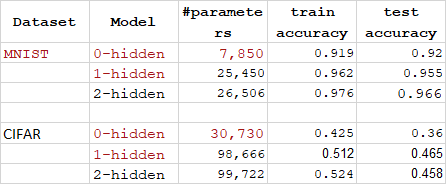<table>


---



#### Loading the MNIST Dataset

11501568/11490434 [==============================] - 0s 0us/step
MNIST_train_images.shape = (60000, 28, 28, 1)
MNIST_train_labels.shape = (60000,)
MNIST_test_images.shape = (10000, 28, 28, 1)
MNIST_test_labels.shape = (10000,)


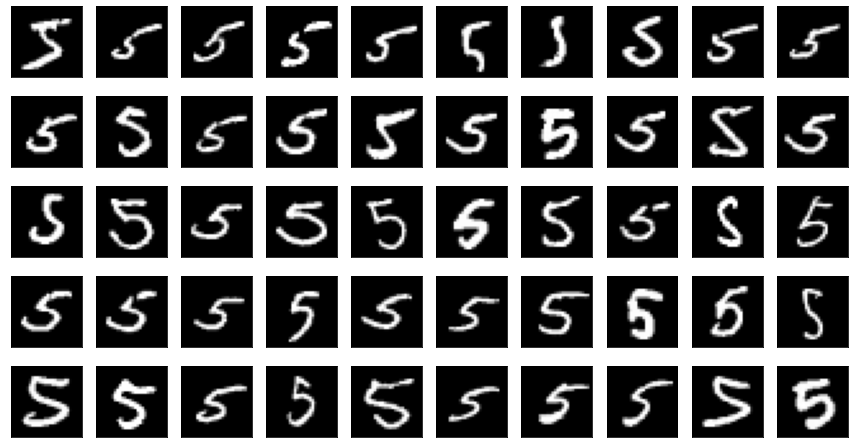

In [16]:
# 1. load/download the data
(MNIST_train_images, MNIST_train_labels), (MNIST_test_images, MNIST_test_labels) = tf.keras.datasets.mnist.load_data()

# 2. flatten the labels (easier to deal with)
MNIST_train_labels = MNIST_train_labels.flatten()  # (50000, 1) -> (50000,)
MNIST_test_labels = MNIST_test_labels.flatten()    # (10000, 1) -> (10000,)

# 3. convert uint8->float32 and normalize range to 0.0-1.0 
MNIST_train_images = MNIST_train_images.astype('float32') / 255.0
MNIST_test_images = MNIST_test_images.astype('float32') / 255.0

# 4. expand the dimensions (tensorflow expects images in a (H,W,C) format):
# (Height, Width, Channel), in our case we have 3 color channels (R,G,B)
MNIST_train_images = MNIST_train_images[...,None]
MNIST_test_images = MNIST_test_images[..., None]

# 5. print the shapes
print('MNIST_train_images.shape =',MNIST_train_images.shape)
print('MNIST_train_labels.shape =',MNIST_train_labels.shape)
print('MNIST_test_images.shape =',MNIST_test_images.shape)
print('MNIST_test_labels.shape =',MNIST_test_labels.shape)

# 6. lets plot some "5"s (just for fun)
[idx] = np.where(MNIST_train_labels==5) # find all the "5"s
plt.figure(figsize=(15,8))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(MNIST_train_images[idx[i],:,:,0], cmap='gray')
    plt.xticks([]), plt.yticks([])

---
#### Loading the CIFAR-10 Dataset

When running this command for the first time, it will download dataset from a remote server, which might take some time.. (in case of server error - just try again a bit later)

CIFAR_train_images.shape = (50000, 32, 32, 3)
CIFAR_train_labels.shape = (50000,)
CIFAR_test_images.shape = (10000, 32, 32, 3)
CIFAR_test_labels.shape = (10000,)


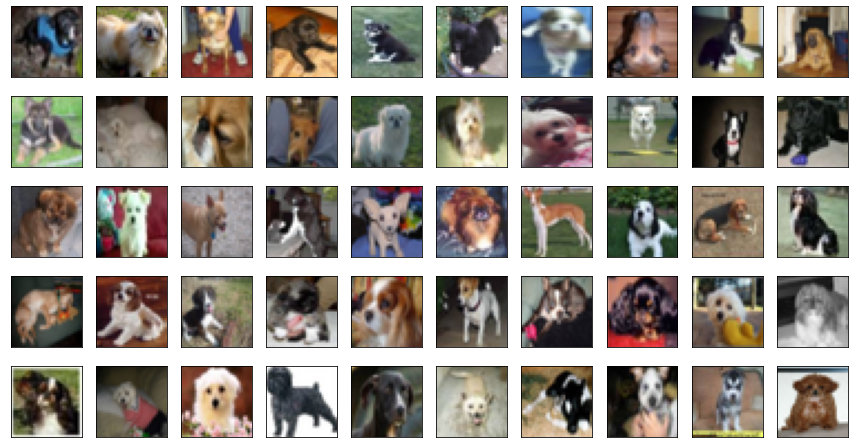

In [17]:
# 1. load/download the data
(CIFAR_train_images, CIFAR_train_labels), (CIFAR_test_images, CIFAR_test_labels) = tf.keras.datasets.cifar10.load_data()

# 2. flatten the labels (easier to deal with)
CIFAR_train_labels = CIFAR_train_labels.flatten()  # (50000, 1) -> (50000,)
CIFAR_test_labels = CIFAR_test_labels.flatten()    # (10000, 1) -> (10000,)

# 3. convert uint8->float32 and normalize range to 0.0-1.0 
CIFAR_train_images = CIFAR_train_images.astype('float32') / 255.0
CIFAR_test_images = CIFAR_test_images.astype('float32') / 255.0

# 4. define the 10 classes names
CIFAR_class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

# 5. print the shapes
print('CIFAR_train_images.shape =',CIFAR_train_images.shape)
print('CIFAR_train_labels.shape =',CIFAR_train_labels.shape)
print('CIFAR_test_images.shape =',CIFAR_test_images.shape)
print('CIFAR_test_labels.shape =',CIFAR_test_labels.shape)

# 6. lets plot some 'dogs' (just for fun)
[idx] = np.where(CIFAR_train_labels==5) # find all the dogs
plt.figure(figsize=(15,8))
for i in range(50):
  plt.subplot(5,10,i+1)
  plt.imshow(CIFAR_train_images[idx[i]])
  plt.xticks([]), plt.yticks([])

***
#### 1. MNIST with 0-hidden


In [18]:
model = Sequential(name='mnist')
model.add(Flatten(input_shape=(28, 28,1))) 
model.add(Dense(10,activation='softmax'))
model.summary()

model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "mnist"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [19]:
history = model.fit(MNIST_train_images, MNIST_train_labels, epochs=50, batch_size=64, verbose=0, validation_data=(MNIST_test_images,MNIST_test_labels ))  

accuracy train: 0.9199666380882263
accuracy test: 0.9208999872207642


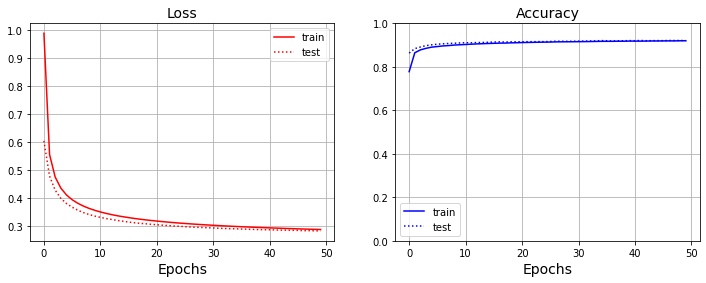

In [20]:
figure_result(history.history['loss'],history.history['val_loss'],history.history['accuracy'],history.history['val_accuracy'])

***
#### 2. MNIST with 1-hidden

In [21]:
model = Sequential(name='mnist-with-1-hidden')
model.add(Flatten(input_shape=(28, 28,1))) 
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Model: "mnist-with-1-hidden"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


accuracy train: 0.9621999859809875
accuracy test: 0.9555000066757202


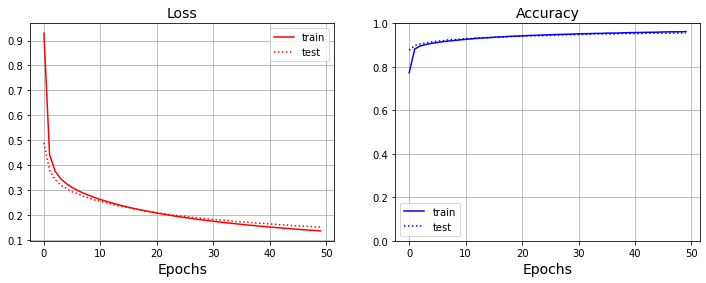

In [22]:
history = model.fit(MNIST_train_images, MNIST_train_labels, epochs=50, batch_size=64, verbose=0, validation_data=(MNIST_test_images,MNIST_test_labels ))  
figure_result(history.history['loss'],history.history['val_loss'],history.history['accuracy'],history.history['val_accuracy'])

***
#### 3. MNIST with 2-hidden


In [23]:
model = Sequential(name='mnist-with-1-hidden')
model.add(Flatten(input_shape=(28, 28,1))) 
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Model: "mnist-with-1-hidden"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_12 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_13 (Dense)             (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


accuracy train: 0.9768499732017517
accuracy test: 0.9661999940872192


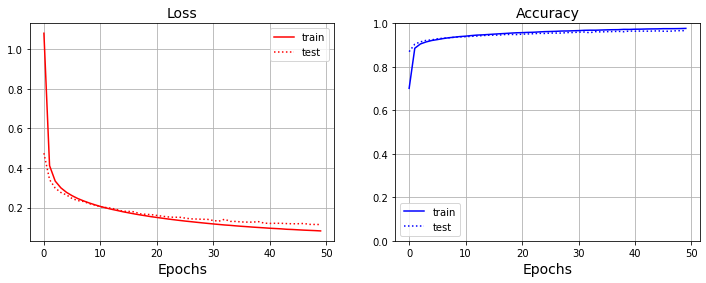

In [24]:
history = model.fit(MNIST_train_images, MNIST_train_labels, epochs=50, batch_size=64, verbose=0, validation_data=(MNIST_test_images,MNIST_test_labels ))  
figure_result(history.history['loss'],history.history['val_loss'],history.history['accuracy'],history.history['val_accuracy'])

***
#### 4. CIFAR with 0-hidden


In [25]:
model = Sequential(name='cifar-with-0-hidden')
model.add(Flatten(input_shape=(32,32,3))) 
model.add(Dense(10,activation='softmax'))
model.summary()

model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "cifar-with-0-hidden"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


In [26]:
print('train: \t',CIFAR_train_images.shape, '\ty:',CIFAR_train_labels.shape)
print('test: \t',CIFAR_test_images.shape, '\ty:',CIFAR_test_labels.shape)

train: 	 (50000, 32, 32, 3) 	y: (50000,)
test: 	 (10000, 32, 32, 3) 	y: (10000,)


accuracy train: 0.4257200062274933
accuracy test: 0.3603000044822693


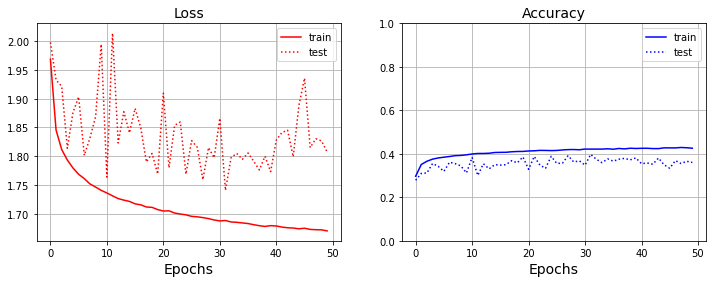

In [27]:
history = model.fit(CIFAR_train_images, CIFAR_train_labels, epochs=50, batch_size=64, verbose=0, validation_data=(CIFAR_test_images,CIFAR_test_labels ))  
figure_result(history.history['loss'],history.history['val_loss'],history.history['accuracy'],history.history['val_accuracy'])

***
#### 5. CIFAR with 1-hidden



In [28]:
model = Sequential(name='cifar-with-0-hidden')
model.add(Flatten(input_shape=(32,32,3))) 
model.add(Dense(32,activation='ReLU'))
model.add(Dense(10,activation='softmax'))
model.summary()
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "cifar-with-0-hidden"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 32)                98336     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                330       
Total params: 98,666
Trainable params: 98,666
Non-trainable params: 0
_________________________________________________________________


accuracy train: 0.5125799775123596
accuracy test: 0.4652999937534332


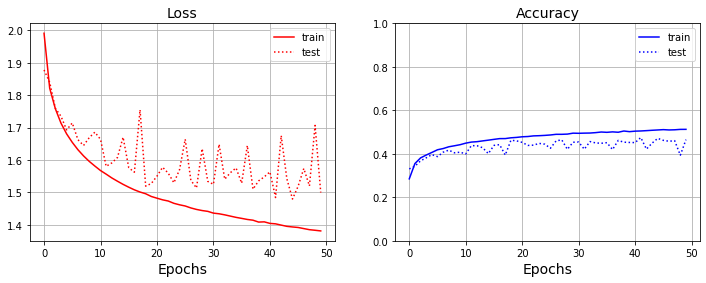

In [29]:
history = model.fit(CIFAR_train_images, CIFAR_train_labels, epochs=50, batch_size=64, verbose=0, validation_data=(CIFAR_test_images,CIFAR_test_labels ))  
figure_result(history.history['loss'],history.history['val_loss'],history.history['accuracy'],history.history['val_accuracy'])

***
#### 6. CIFAR with 2-hidden


In [30]:
model = Sequential(name='cifar-with-0-hidden')
model.add(Flatten(input_shape=(32,32,3))) 
model.add(Dense(32,activation='ReLU'))
model.add(Dense(32,activation='ReLU'))
model.add(Dense(10,activation='softmax'))
model.summary()
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "cifar-with-0-hidden"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 32)                98336     
_________________________________________________________________
dense_18 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_19 (Dense)             (None, 10)                330       
Total params: 99,722
Trainable params: 99,722
Non-trainable params: 0
_________________________________________________________________


accuracy train: 0.5248799920082092
accuracy test: 0.45829999446868896


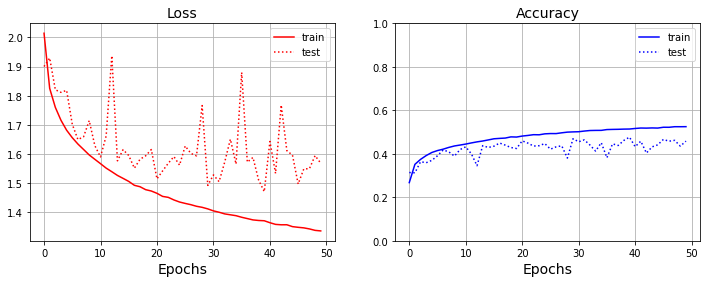

In [31]:
history = model.fit(CIFAR_train_images, CIFAR_train_labels, epochs=50, batch_size=64, verbose=0, validation_data=(CIFAR_test_images,CIFAR_test_labels ))  
figure_result(history.history['loss'],history.history['val_loss'],history.history['accuracy'],history.history['val_accuracy'])

***

## Good Luck!

- **don't forget to fill the summary table on the top !!**
